In [ ]:
#Project Description:
#here the dataset is related to the quality of the wine based on the diffienent different parameter(features).
#this is basically a classification model to predict the model quality.
#Input variables (based on physicochemical tests):
#1 - fixed acidity
#2 - volatile acidity
#3 - citric acid
#4 - residual sugar
#5 - chlorides
#6 - free sulfur dioxide
#7 - total sulfur dioxide
#8 - density
#9 - pH
#10 - sulphates
#11 - alcohol
#Output variable (based on sensory data):
#12 - quality (score between 0 and 10)

In [1]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model building lib 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [57]:
#Loading the Dataset:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
pd.set_option('display.max_rows',None)

In [59]:
df.shape

(1599, 12)

In [60]:
#there is 1599 rows and 12 columns is availble in the data

In [61]:
df.info()
#here we can see that we have total 11 features with datatype float64 and 1 label with int datatype, all having no null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [62]:
df.isnull().sum()
#here we have cross checked the null value in every colums and find there is no null value in the columns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

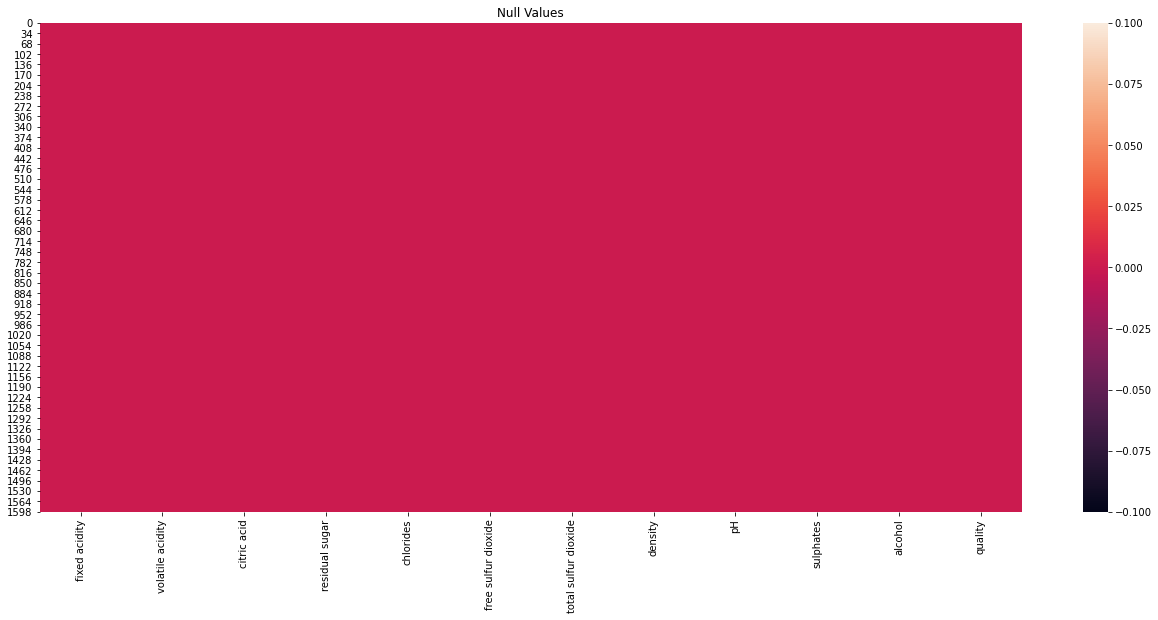

In [63]:
#ploting the heatmap to cross validate the isnull value
plt.figure(figsize=(22,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [64]:
#as we can see there is no space or blackline means there is no null values in dataset.

In [65]:
#as all are the continious/numeric features so there is no need of encoding.

In [66]:
#Discribe the dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [67]:
#here we can see that the mean and midian(50%) diffrence is very less so there is less outliers in dataset.
#Also standerd daviation is also looks fine,and all other paramters.

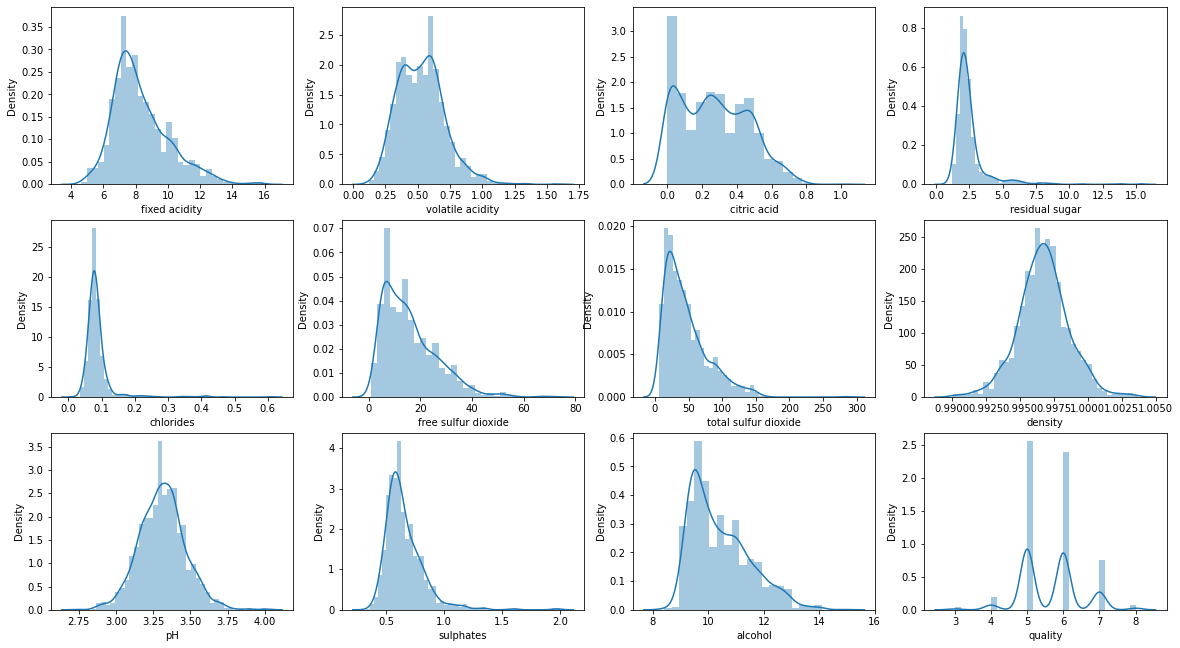

In [68]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df:
    if pltnum <= 30:
        plt.subplot(4,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [69]:
#Here we can see the data distribution is not normal.outliers are visible in the graph.
#as we can we data distribution looks normal for some colums:fixed acidity,citric acid,total sulfur dioxide,alcohol
#as we can we data distribution not normal for some colums:volatile acidity,residual sugar,chlorides,alcohol

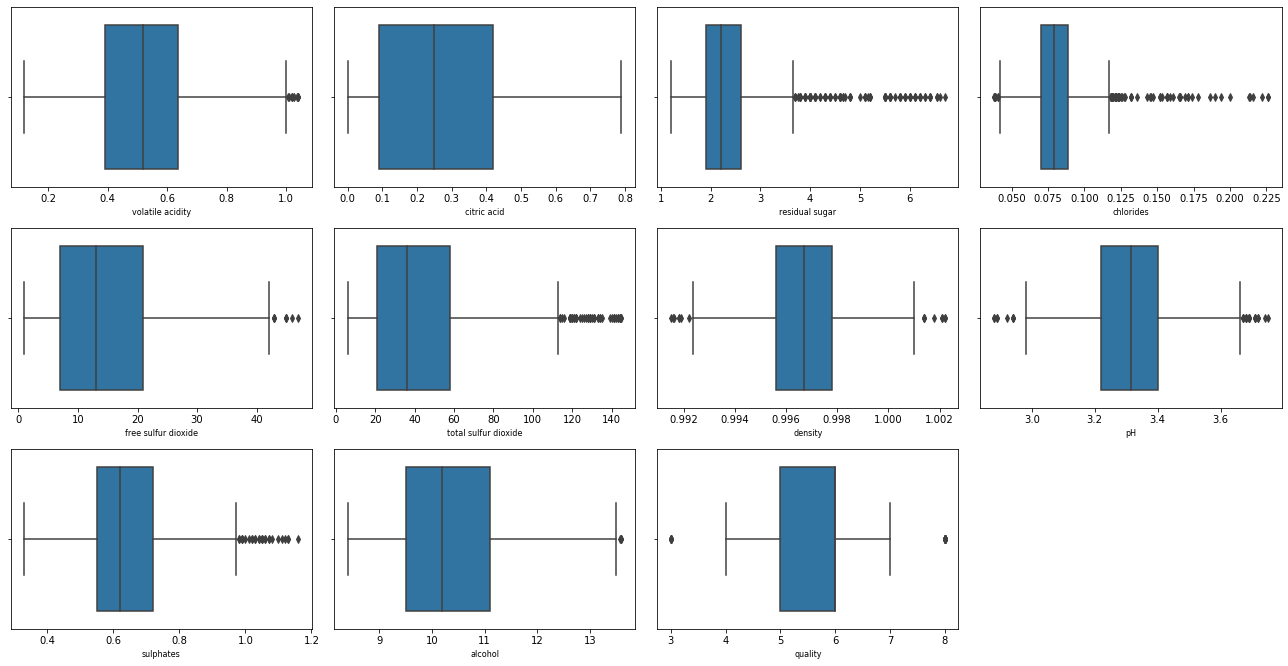

In [126]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:11]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[columns],orient='v')
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [71]:
#as we can see there is lot of skewness available in each feature so we will use z-score to remove the skewness from the dataframe.

In [72]:
#checking the shape of the data before appling the z-score.
df.shape

(1599, 12)

In [73]:
#applying the z-score for the outliers detection on the data frame.
z=np.abs(stats.zscore(df.iloc[:,:11]))
index=np.where(z > 3)[0]

In [74]:
#the total no of index for the outliers.
len(index)

182

In [75]:
#dropping the outliers and resetting the dataframe
df=df.drop(df.index[index])
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [76]:
#dataframe after outlier deletion.
df.shape

(1458, 12)

In [77]:
#Data Loss in percentage
loss_percentage=(1599-1458)/1599*100
print(loss_percentage)

8.818011257035648


In [78]:
#I have tested all the method of outlier deletion and then build the model.the z score is best with less data loss and max accuracy.
#Quantile(%)  = 15.75% data loss(Max accuracy =83.39%(Random forest classifier))
#Z-score = 8.81% data loss(Max accuracy =88.04%(Random forest classifier))
#IQR = 8.94% data loss(Max accuracy =83.79%(Random forest classifier))

#So after seeing the result i have seleted z-socre is best method to remove outliers.

In [79]:
#we can still se some outliers in the features.now we can check for the skewness.

In [80]:
#using the correlation matrix to check the correlation between features and labels:
#also checking the skewness in the data.
corr_matrix=df.abs().corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.497554
sulphates               0.379814
citric acid             0.238244
fixed acidity           0.135851
residual sugar          0.053999
free sulfur dioxide    -0.063786
pH                     -0.084922
chlorides              -0.120832
density                -0.177758
total sulfur dioxide   -0.222634
volatile acidity       -0.362783
Name: quality, dtype: float64

In [81]:
#as we can see there is no skewness in the data as all the columns are inbetween -0.5 to +0.5 range.
#so there is no need to remove the skewness from the dataframe.

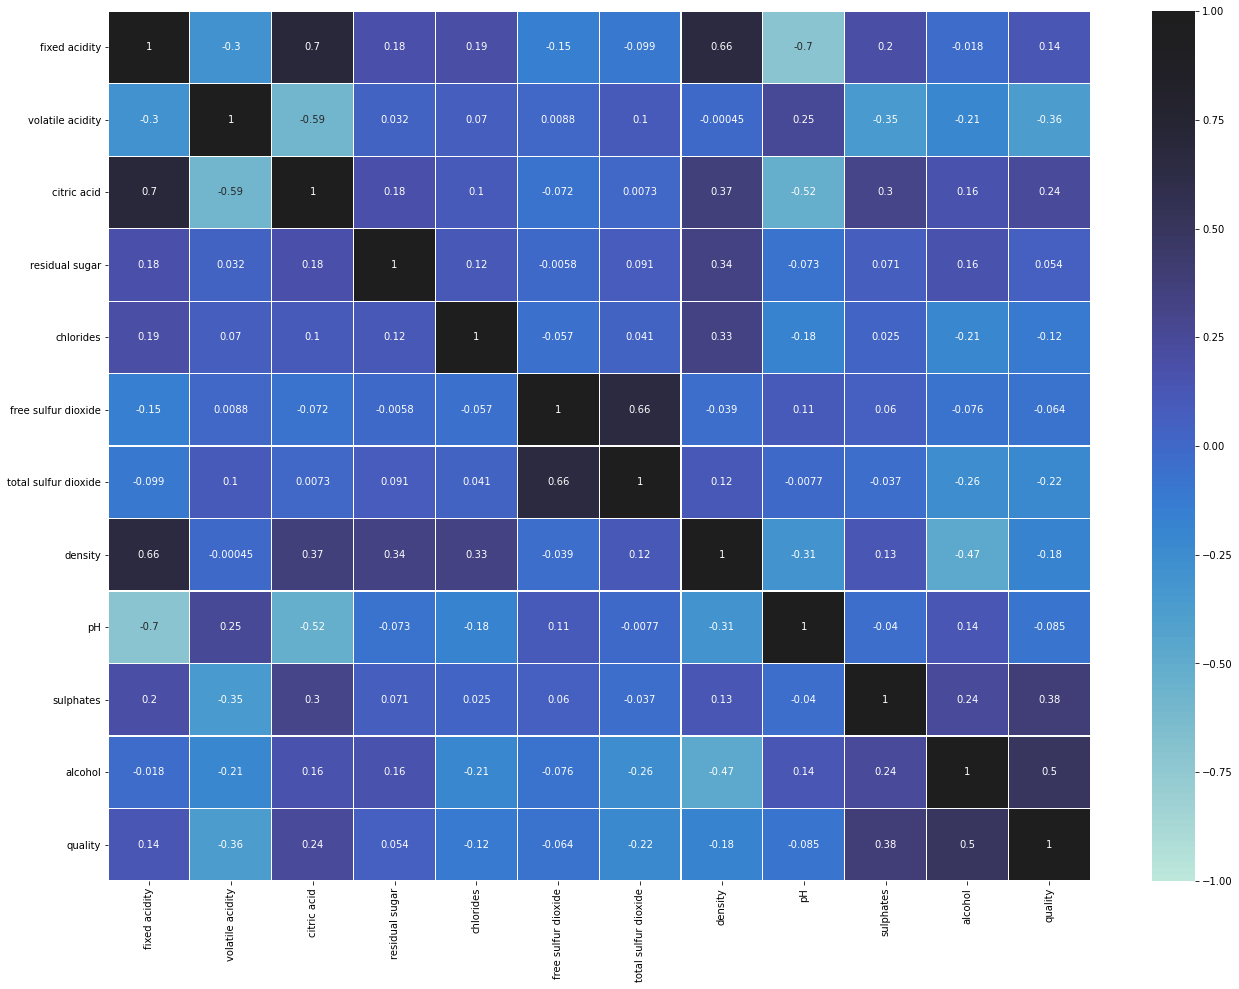

In [82]:
#using the heatmap to check the correlation between features.
corr_matrix=df.abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [83]:
#seprating the features and labels/targets to check multicolliniarity between features
x=df.drop(columns='quality',axis=1)
y=df['quality']

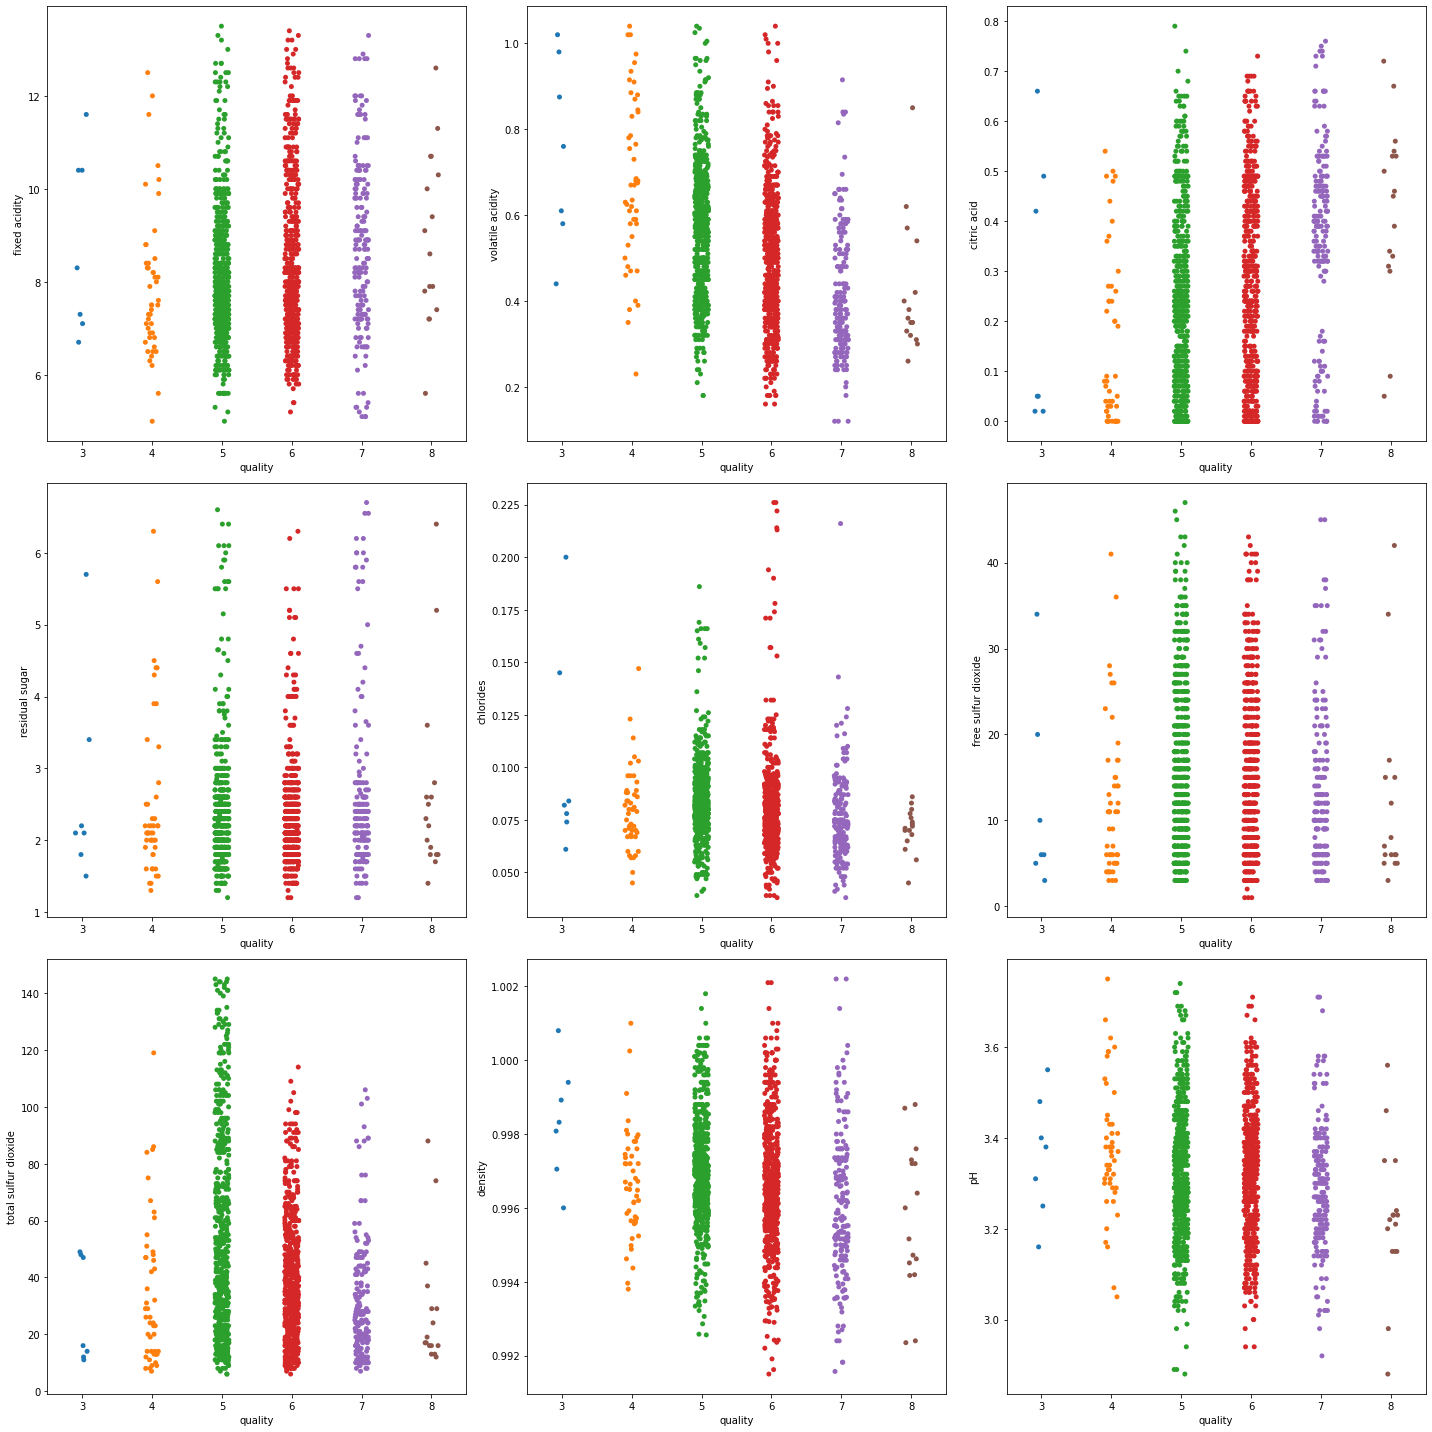

In [84]:
#plotting the strips plot to check for data distribution after managing the outliers and skewness:
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in x:
    if pltnum <= 9:
        plt.subplot(3,3,pltnum)
        sns.stripplot(y,x[column])
      #  plt.xlabel(column,fontsize=15)
    pltnum+=1
plt.tight_layout()    

In [ ]:
#here we can see that distribution between target and features looks normal after deleting the outliers and skewness.

In [85]:
#using standerd scalar for scaling the features
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [86]:
#using vif for checking the multicollinearity between the colums
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,7.941157,fixed acidity
1,1.869151,volatile acidity
2,3.200976,citric acid
3,1.657880,residual sugar
4,1.170025,chlorides
5,1.936150,free sulfur dioxide
6,2.182674,total sulfur dioxide
7,6.420347,density
8,3.199093,pH
9,1.311525,sulphates


In [87]:
# as we can see there is multicolliniarity between the column 'fixed acidity' and 'density' as both of vif score is greater than 5.
#now we will check correlation between these two columns with label/target.

In [88]:
#checking the correltion with target
corr_matrix=df[['fixed acidity','density','quality']].abs().corr()
corr_matrix['quality'].sort_values(ascending=False)

quality          1.000000
fixed acidity    0.135851
density         -0.177758
Name: quality, dtype: float64

In [89]:
#dropping the fixed acidity feature as it has max vif score.
df=df.drop(columns='fixed acidity',axis=1)

In [90]:
#now again seprating the features and labels/targets
x=df.drop(columns='quality',axis=1)
y=df['quality']

In [91]:
#using standerd scalar for scaling the features
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [92]:
#again using vif for checking the multicollinearity between the colums
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.864524,volatile acidity
1,2.848878,citric acid
2,1.426813,residual sugar
3,1.151121,chlorides
4,1.921532,free sulfur dioxide
5,2.084444,total sulfur dioxide
6,2.603484,density
7,1.518529,pH
8,1.300790,sulphates
9,2.307255,alcohol


In [93]:
#now vif score looks normal as all the vif score below 5

In [94]:
#now checking the target Imbalanced Data 
df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [95]:
#As we can see there is data imbalanced in the target so we are using the upsampling to make target data balanced.

In [294]:
#importing th imblearn library to import SMOTE for upsampling process
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [96]:
#handling class imbalanced problem by oversampling the minority class:
from imblearn.over_sampling import SMOTE

In [97]:
SM=SMOTE(k_neighbors=2)
x_fit,y_fit=SM.fit_resample(x_data,y)

In [98]:
y_fit.value_counts()

7    617
5    617
3    617
8    617
6    617
4    617
Name: quality, dtype: int64

In [99]:
#after appling the upsampling the data looks balanced now we can perform the test_train_split opration

In [100]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 86.39%
The Best Random State is : 43


In [101]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=178)

In [102]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 82.94%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.97      0.99      0.98       164
           4       0.86      0.89      0.87       159
           5       0.70      0.60      0.65       150
           6       0.59      0.62      0.60       141
           7       0.86      0.87      0.87       156
           8       0.96      0.97      0.96       156

    accuracy                           0.83       926
   macro avg       0.82      0.82      0.82       926
weighted avg       0.83      0.83      0.83       926
 

=========Confusion Matrix============
[[162   1   1   0   0   0]
 [  3 141   3  11   1   0]
 [  2  12  90  38   8   0]
 [  0  10  29  88  11   3]
 [  0   0   6  10 136   4]
 [  0   0   0   3   2 151]]


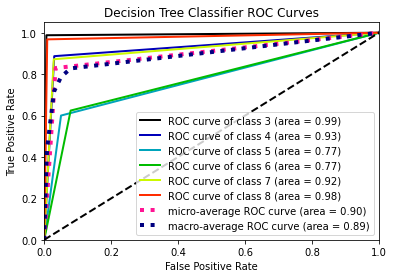

In [134]:
#plotting the roc auc curve for Decision Tree Classifier
prob_ydt=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob_ydt)
plt.title('Decision Tree Classifier ROC Curves')
plt.show()

In [103]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 37.58%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       164
           4       0.29      0.77      0.42       159
           5       0.00      0.00      0.00       150
           6       0.28      0.36      0.32       141
           7       0.49      0.29      0.37       156
           8       0.56      0.82      0.66       156

    accuracy                           0.38       926
   macro avg       0.27      0.38      0.30       926
weighted avg       0.27      0.38      0.30       926
 

=========Confusion Matrix============
[[  0 133   0  31   0   0]
 [  0 123   0  36   0   0]
 [  0 105   0  37   4   4]
 [  0  56   0  51  15  19]
 [  0   5   0  27  46  78]
 [  0   0   0   0  28 128]]


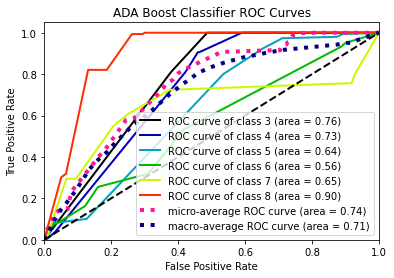

In [136]:
#plotting the roc auc curve for ADA Boost Classifier
prob_yada=abc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob_yada)
plt.title('ADA Boost Classifier ROC Curves')
plt.show()

In [143]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

svc=SVC(probability=True)
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 78.73%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.95      1.00      0.97       164
           4       0.84      0.94      0.88       159
           5       0.63      0.61      0.62       150
           6       0.57      0.47      0.51       141
           7       0.83      0.70      0.76       156
           8       0.82      0.96      0.88       156

    accuracy                           0.79       926
   macro avg       0.77      0.78      0.77       926
weighted avg       0.78      0.79      0.78       926
 

=========Confusion Matrix============
[[164   0   0   0   0   0]
 [  2 149   5   2   1   0]
 [  6  22  92  22   5   3]
 [  1   6  46  66  10  12]
 [  0   1   2  26 109  18]
 [  0   0   0   0   7 149]]


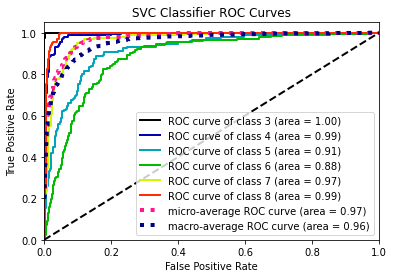

In [144]:
#plotting the roc auc curve for SVC Classifier
prob_svc=svc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob_svc)
plt.title('SVC Classifier ROC Curves')
plt.show()

In [105]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 88.77%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       164
           4       0.96      0.97      0.97       159
           5       0.75      0.79      0.77       150
           6       0.71      0.61      0.66       141
           7       0.88      0.94      0.91       156
           8       0.98      0.99      0.98       156

    accuracy                           0.89       926
   macro avg       0.88      0.88      0.88       926
weighted avg       0.88      0.89      0.89       926
 

=========Confusion Matrix============
[[164   0   0   0   0   0]
 [  1 154   1   2   1   0]
 [  0   4 118  23   5   0]
 [  0   2  37  86  13   3]
 [  0   0   2   8 146   0]
 [  0   0   0   2   0 154]]


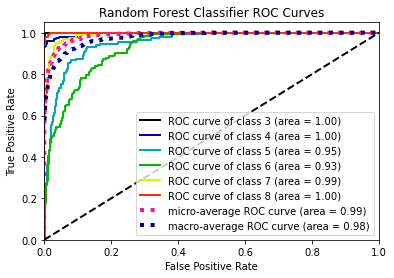

In [133]:
#plotting the roc auc curve for Random Forest Classifier
prob_yrfc=rfc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob_yrfc)
plt.title('Random Forest Classifier ROC Curves')
plt.show()

In [106]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 80.78%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.95      1.00      0.98       164
           4       0.81      0.99      0.89       159
           5       0.63      0.53      0.57       150
           6       0.59      0.40      0.48       141
           7       0.82      0.87      0.84       156
           8       0.90      1.00      0.95       156

    accuracy                           0.81       926
   macro avg       0.78      0.80      0.78       926
weighted avg       0.79      0.81      0.79       926
 

=========Confusion Matrix============
[[164   0   0   0   0   0]
 [  1 157   1   0   0   0]
 [  6  25  79  28   9   3]
 [  1  10  43  57  21   9]
 [  0   1   3  12 135   5]
 [  0   0   0   0   0 156]]


In [107]:
#Now checking the Overfitting of the all the models using cross_val_score.

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_fit,y_fit,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_svc=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 83.77%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 76.91%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 31.44%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 76.55%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 77.50%



In [119]:
#we can not use roc_auc_curve combine here as the target has multiple outcome and it is work on the binary outcome only.

In [111]:
#we are selecting here the Random forest classifier as it shows the highest accracy and lowest differece between the 
#accuracy and the cross validation score

In [112]:
#now performing the hyper parameter tuning using gridsearchcv

In [113]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'criterion':['gini','entropy'],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [114]:
gridcv=GridSearchCV(rfc,param_grid=best_param)

In [115]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [116]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [117]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 15,min_samples_leaf=2,min_samples_split=2,n_estimators= 80)
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 88.01%

======Classification Report=============
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       164
           4       0.97      0.94      0.96       159
           5       0.73      0.79      0.76       150
           6       0.70      0.62      0.66       141
           7       0.88      0.90      0.89       156
           8       0.99      0.98      0.98       156

    accuracy                           0.88       926
   macro avg       0.87      0.87      0.87       926
weighted avg       0.88      0.88      0.88       926
 

=========Confusion Matrix============
[[164   0   0   0   0   0]
 [  2 150   4   2   1   0]
 [  1   3 119  21   6   0]
 [  0   2  36  88  13   2]
 [  0   0   3  12 141   0]
 [  0   0   0   3   0 153]]


In [ ]:
#here after performing the hyper parameter tuning the accuracy still has same.the new Accuracy Score is : 88.01%
#So we are saving this model as our final output.

In [120]:
#plotting the cross validation pridict
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfc,x_test,y_test)

In [122]:
#installing the scikit-plot
!pip install scikit-plot

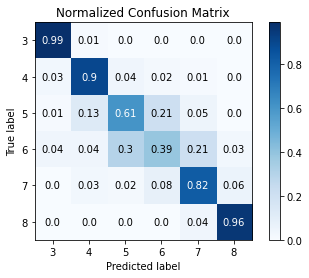

In [123]:
#plotting the confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [ ]:
#here we can see the relation between true labels vs predicted label for random forest classifier.

In [ ]:
#after the Hyper parameter tuning also accuracy increass to 88%.so we are saving this model.
#here Random Forest Classifier is our best model to provide the highest accuracy.

In [125]:
#Saving the model
import joblib
joblib.dump(rfc,'Wine_quality.pkl')

['Wine_quality.pkl']

In [ ]:
#here we have saved our final model of random forest classifier.